In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=np.array([0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1])
data=data.reshape(5,4)
data=pd.DataFrame(data)
data.columns=['Smoking','Obesity','Exercise','Diabetic']
print(data)

   Smoking  Obesity  Exercise  Diabetic
0        0        1         0         1
1        0        0         1         0
2        1        0         0         0
3        1        1         0         1
4        1        1         1         1


In [3]:
data.index = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5']
data["Person"] = data.index
data.reset_index(drop=True, inplace=True)
data

,Smoking,Obesity,Exercise,Diabetic,Person
0,0,1,0,1,Person1
1,0,0,1,0,Person2
2,1,0,0,0,Person3
3,1,1,0,1,Person4
4,1,1,1,1,Person5


In [4]:
data=data[["Person","Smoking","Obesity","Exercise","Diabetic"]]
data

,Person,Smoking,Obesity,Exercise,Diabetic
0,Person1,0,1,0,1
1,Person2,0,0,1,0
2,Person3,1,0,0,0
3,Person4,1,1,0,1
4,Person5,1,1,1,1


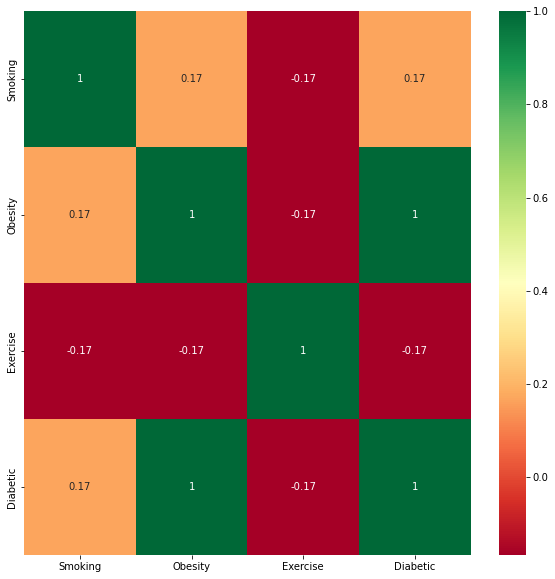

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


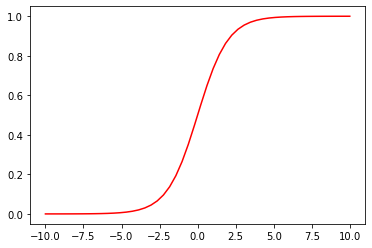

In [8]:
plt.plot((np.linspace(-10,10,50)),sigmoid((np.linspace(-10,10,50))),c='r')

In [9]:
labels = np.array(data.Diabetic).reshape(5, 1)
labels


array([[1],
       [0],
       [0],
       [1],
       [1]])

In [10]:
features = np.array(data[["Smoking", "Obesity", "Exercise"]])
features


array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [11]:
np.random.seed(1)
weights=np.random.rand(3,1)
bias=np.random.rand(1)
lr=0.05

In [12]:
def sigmoid_der(x):
  return sigmoid(x)*(1-sigmoid(x))


In [13]:
for epoch in range(20000):
  xw = np.dot(features,weights) + bias
  output=sigmoid(xw)
  error=output-labels
  print(error.sum())
  dcost_dpred=error
  dpred_dz=sigmoid_der(output)
  z_delta =dcost_dpred*dpred_dz

  weights -= lr *np.dot(features.T,z_delta)

  for num in z_delta:
    bias -=lr*num

0.599822911527503
0.5927380994319355
0.5857502310349619
0.5788588563379554
0.5720634797227729
0.5653635621788177
0.5587585235014109
0.5522477444578883
0.5458305689181491
0.539506305946706
0.5332742318535755
0.5271335922016546
0.521083603768493
0.5151234564606516
0.5092523151790846
0.5034693216342273
0.4977735961097062
0.49216423917380303
0.4866403333380033
0.4812009446621628
0.47584512430599823
0.4705719100267767
0.46538032762323556
0.4602693923259038
0.45523811013414084
0.4502854791003077
0.44541049056162274
0.4406121303203323
0.43588937977293296
0.431241216989253
0.42666661774228387
0.4221645564897031
0.41773400730810306
0.41337394478097533
0.40908334484154707
0.40486118557160133
0.40070644795744703
0.3966181166042133
0.39259518040967845
0.3886366331988427
0.38474147432047145
0.3809087092068325
0.3771373498978573
0.37342641553094535
0.3697749327976362
0.3661819363683474
0.36264646928637956
0.35916758333236565
0.35574433936032956
0.3523758076064978
0.34906106797198966
0.34579921028048

In [14]:
# person who smokes , is not obese and doesn't excercise
single_point = np.array([1, 0, 0])
result = sigmoid(np.dot(single_point, weights) + bias)
result


array([0.00708491])

In [16]:
# person who doesn't smokes , is obese and doesn't excercise
single_point = np.array([0, 1, 0])
result = sigmoid(np.dot(single_point, weights) + bias)
print(result)


[0.99840337]
